# Analyze Results from Eval-Experiment

This notebook analyzes the results of the Eval-Experiment.

In [1]:
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,Partition,DataSet,Algorithm,BuildTime,TestTime,5R.MRR,5R.MRR.OfGood,5R.TopN.nDCG,5R.MAP,5R.MAP.OfGood,...,500R.Recall,500R.F1,1000R.MRR,1000R.MRR.OfGood,1000R.TopN.nDCG,1000R.MAP,1000R.MAP.OfGood,1000R.Precision,1000R.Recall,1000R.F1
0,2,ratings.csv,Funksvd,10.337,21.226,0.722886,0.728321,0.679003,0.561887,0.566112,...,0.006716,0.006716,0.007223,0.193571,0.004132,0.001122,0.030071,0.005224,0.005224,0.005224
1,4,ratings.csv,Funksvd,10.352,23.436,0.797494,0.797494,0.700963,0.595995,0.595995,...,0.001504,0.001504,0.004386,0.291667,0.002052,0.000439,0.029167,0.001504,0.001504,0.001504
2,5,ratings.csv,Funksvd,10.449,23.776,0.742105,0.742105,0.686075,0.572510,0.572510,...,0.003759,0.003759,0.005293,0.175992,0.002374,0.000529,0.017599,0.003759,0.003759,0.003759
3,3,ratings.csv,Funksvd,10.346,26.480,0.753358,0.753358,0.706474,0.593291,0.597752,...,0.005224,0.005224,0.006290,0.280952,0.002541,0.000629,0.028095,0.002239,0.002239,0.002239
4,1,ratings.csv,Funksvd,10.371,33.284,0.802363,0.802363,0.695516,0.592001,0.592001,...,0.005970,0.005970,0.003989,0.133631,0.002226,0.000565,0.018919,0.003731,0.003731,0.003731


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [4]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,5R.MRR,5R.MRR.OfGood,5R.TopN.nDCG,5R.MAP,5R.MAP.OfGood,5R.Precision,5R.Recall,5R.F1,...,500R.Recall,500R.F1,1000R.MRR,1000R.MRR.OfGood,1000R.TopN.nDCG,1000R.MAP,1000R.MAP.OfGood,1000R.Precision,1000R.Recall,1000R.F1
Algorithm,,,,,,,,,,,,,,,,,,,,,
Funksvd,10.3710,25.6404,0.763641,0.764728,0.693606,0.583137,0.584874,0.739618,0.739378,0.739498,...,0.004635,0.004635,0.005436,0.215163,0.002665,0.000657,0.024770,0.003291,0.003291,0.003291
ItemItem,33.2456,34.4890,0.882512,0.882512,0.778929,0.702134,0.702134,0.815615,0.810490,0.813042,...,0.035326,0.035326,0.026685,0.199833,0.011546,0.002972,0.022417,0.014668,0.014668,0.014668
SlopOne,31.3796,33.3206,0.731907,0.732995,0.683324,0.567916,0.568779,0.734662,0.734423,0.734542,...,0.003141,0.003141,0.005295,0.267189,0.001586,0.000617,0.032552,0.001945,0.001945,0.001945


## Plotting Results

Let's start plotting things. What's the MRR achieved by each algorithm?

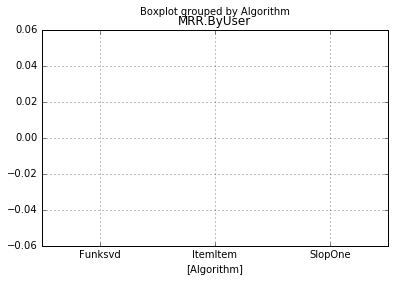

In [5]:
results.loc[:,['Algorithm', 'MRR.ByUser']].boxplot(by='Algorithm')

Next up: nDCG

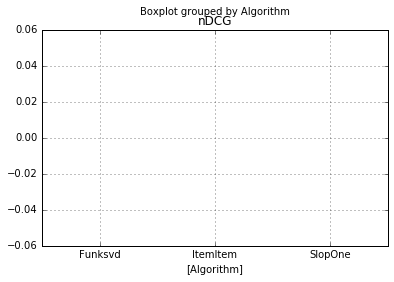

In [6]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm')

Next : MAP

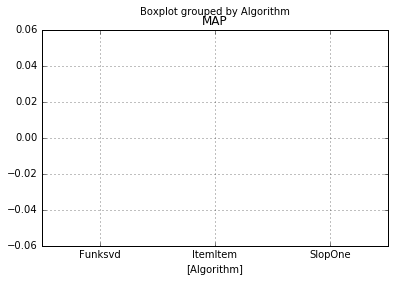

In [7]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm')

Next : PR

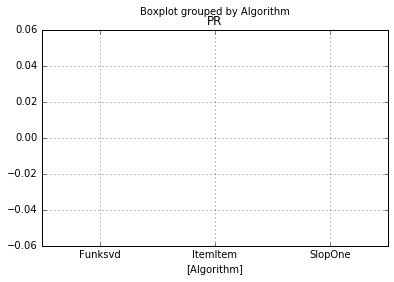

In [8]:
results.loc[:,['Algorithm', 'PR']].boxplot(by='Algorithm')

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109729690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x109a72310>], dtype=object)

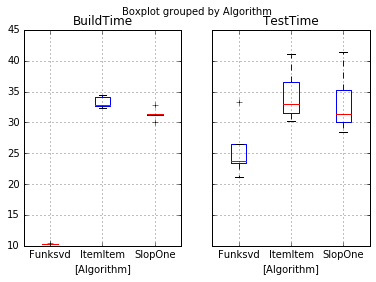

In [9]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm')